# Chapter 8: Dimensionality Reduction

Curse of dimensionality: Dataset having many features not only make training extremely slow but also make it much harder to find a good solution.

Example: If 2 points picked randomly in a unit square,

Dimensionality reduction methods
- PCA (Principal Component Analysis)
- Kernel PCA
- LLE

# Two Main Approaches to Dimensionality Reduction: Projection and Manifold Learning

## Projection
- In most real world problems, training instances are not spread out uniformly across dimensions
- All training instances lie within a much lower-dimensional subspace of higher dimensional space.
- HOWEVER, projection may not be ideal for dimensionality reduction in datasets such as the Swiss roll datset

In [51]:
# Plot Swiss roll dataset from Scikit-Learn

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

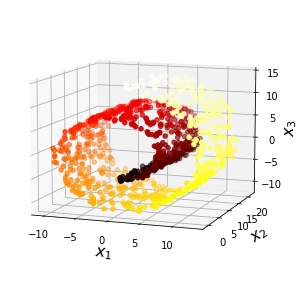

In [25]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70) # setting angle of view for 3d plot
ax.set_xlabel("$x_1$", fontsize=16)
ax.set_ylabel("$x_2$", fontsize=16)
ax.set_zlabel("$x_3$", fontsize=16)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

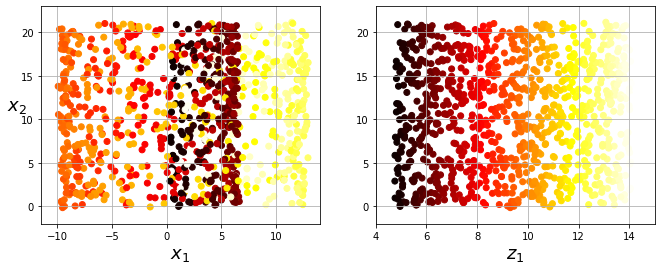

In [29]:
# Squashing by projecting onto plane vs unrolling data
plt.figure(figsize=(11,4))

plt.subplot(121) # same as plt.subplot(1, 2, 1) (nrows, ncols, index(from 1))
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

As seen above in the two plots, making projections would only squash different layers of the Swiss roll together, which would not be ideal.

## Manifold Learning

2D manifold: 2D shape that can be bent and twisted in higher-dimensional shape
- Example: Swiss roll

Manifold assumption (manifold hypothesis)
- Most real-world high-dimensional datasets lie closer to a much lower-dimensional manifold.

In [31]:
# Decision boundaries in 3D vs 2D
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

## First plot - 111
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos=[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

## Second plot - 111
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

## Third plot - 111
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

## Fourth plot - 111
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

SyntaxError: invalid syntax (<ipython-input-31-29107f76d608>, line 20)

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA)
- Identifies hyperplane that lies closest to data
- Projects data onto it

Preserving the Variance
- Choose the right hyperplane

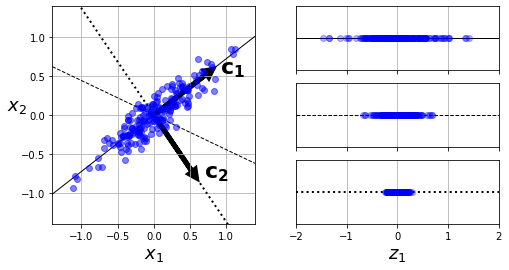

In [34]:
# PCA plot and Singular Value Decomposition (SVD)

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

PCA
- First axis: solid line (along which c1 is located): axis that accounts for largest amount of variance
- Second axis: orthogonal to first one, that accounts for the largest amount of remaining variance
- (As dimension gets bigger, would find third axis orthogonal to plane on which the 2 arrows lie)

- Singular Value Decomposition (SVD) U * (sigma) * (Transpose of V)
- c1 and c2 are unit vectors that compose vector V (principal components matrix)

- NOTE: PCA assumes that dataset is CENTERED around the ORIGIN.

# Projecting Down to d Dimensions

- Can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by first d principal components.
- X_(d-proj) = X * (W_d), where X_(d-proj): reduced dataset of dimensionality d and W_d (matrix containing first d columns of V, of unit vectors of axes)

# Explained Variance Ratio

Explained variance ratio of each principal component
- Proportion of dataset's variance that lies along each principal component

In [35]:
# PCA with MNIST dataset

# fetch_openml() returns pandas DataFrame by default
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [38]:
# Split data into training set and testing set
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
# Perform PCA without reducing dimensionality and compute minimum number of dimensions to preserve 95% of training set's variance
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [41]:
d

154

Minimum number of dimensions required to preserve 95% of the training set's variance is 154.

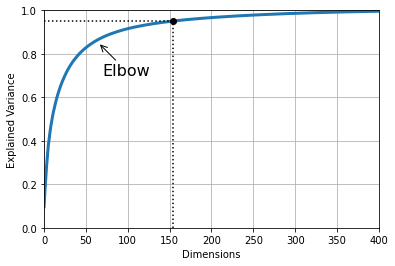

In [44]:
# Explained variance as function of number of dimensions
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3) # cumsum curve plot
plt.axis([0, 400, 0, 1]) # axes
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:") # plot dotted line
plt.plot([0, d], [0.95, 0.95], "k:") # plot dotted line
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
            arrowprops=dict(arrowstyle="->"), fontsize=16) # make arrow
plt.grid(True)
plt.show()

In [45]:
# Alternatively, using Scikit-Learn's PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [46]:
pca.n_components_

154

In [47]:
np.sum(pca.explained_variance_ratio_)

0.9503207480330474

In [48]:
# PCA for Compression
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [49]:
# MNIST compression that preserves 95% of the variance

# Make function to plot images of digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

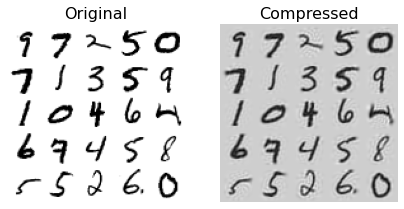

In [52]:
# Use function to plot
plt.figure(figsize=(7, 4))

# Original plot
plt.subplot(121) 
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)

# Compressed plot
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [53]:
X_reduced_pca = X_reduced

# Randomized PCA

In [54]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

# Incremental PCA

Incremental PCA does not require whole training set to fit in memory. This allows splitting the training set into mini-batches and feed an Incremental PCA(IPCA) algorithm one mini-batch at a time (done below through the for loop).

In [56]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # prints . while algorithm is being run through
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [57]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

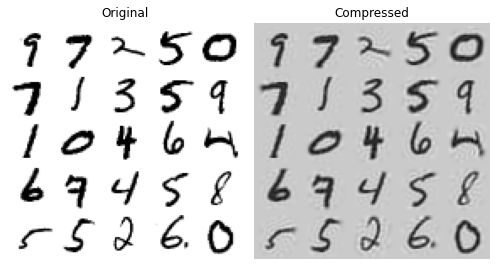

In [59]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original")
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.title("Compressed")
plt.tight_layout()

In [60]:
X_reduced_inc_pca = X_reduced

In [61]:
# Compare results of transforming MNIST using regular PCA and incremental PCA.
np.allclose(pca.mean_, inc_pca.mean_)

True

In [62]:
# Results are not exactly identical. Incremental PCA gives an approximate solution
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

# Kernel PCA

Kernel: implicitly maps instances into a very high-dimensional space (features space)

Makes it possible to perform complex nonlinear projections for dimensionality reduction.

In [63]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [66]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

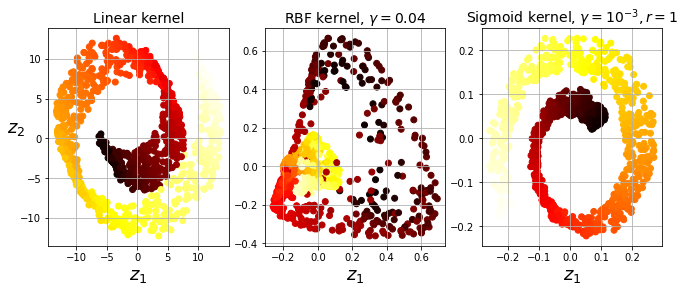

In [67]:
# Swiss roll reduced to 2D with kPCA, using various kernels

# Linear PCA
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
# Radial Basis Function(RBF) PCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
# Sigmoid PCA
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

# Selecting a Kernel and Tuning Hyperparameters

kPCA is an unsupervised learning algorithm
- No obvious performance measure to help you select best kernel and hyperparameter values.
- Dimensionality reduction = preparation step for a supervised learning task that leads to best performance on that task

In [68]:
# Create a two-step pipeline
# 1) Reduce dimensionality to 2 dimensions using kPCA
# 2) Apply Logistic Regression for classification

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [ ]:
# Another approach: select kernel and hyperparameters that yield lowest reconstruction error


By default, fit_inverse_transform=False and KernelPCA has no inverse_transform() method. 
This method, however, CAN be created with fit_inverse_transform=True.

# Locally Linear Embedding (LLE)

- Nonlinear dimensionality reduction (NLDR) technique
- Manifold Learning technique
- Does not rely on projections
- First measures how each training instance linearly relates to its closest neighbors (c.n.), and looks for low-dimensional representation of training set, where these local relationships are best preserved.

In [70]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

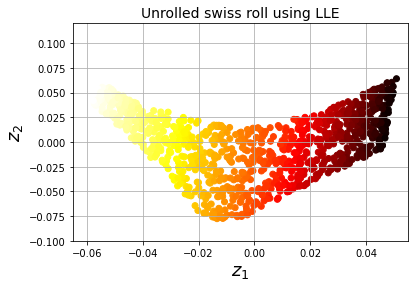

In [71]:
# Unrolled Swiss roll plot, using LLE
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()